## ***Data Cleaning "vgsales.csv"***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
df = pd.read_csv("/content/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Dataset Rows & Columns count

In [3]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

#When you access df.shape[0], you are getting the first element of the tuple
#When you access df.shape[1], you are getting the second element of the tuple

Number of rows: 16598
Number of columns: 11


### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Duplicate Values

In [5]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
print(f"Number of missing values per column:\n{df.isnull().sum()}")
print(f"\nTotal missing values in the dataset: {df.isnull().sum().sum()}")

#total number of missing values across the entire DataFrame is 329



Number of missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Total missing values in the dataset: 329


#### Missing Values/Null Values

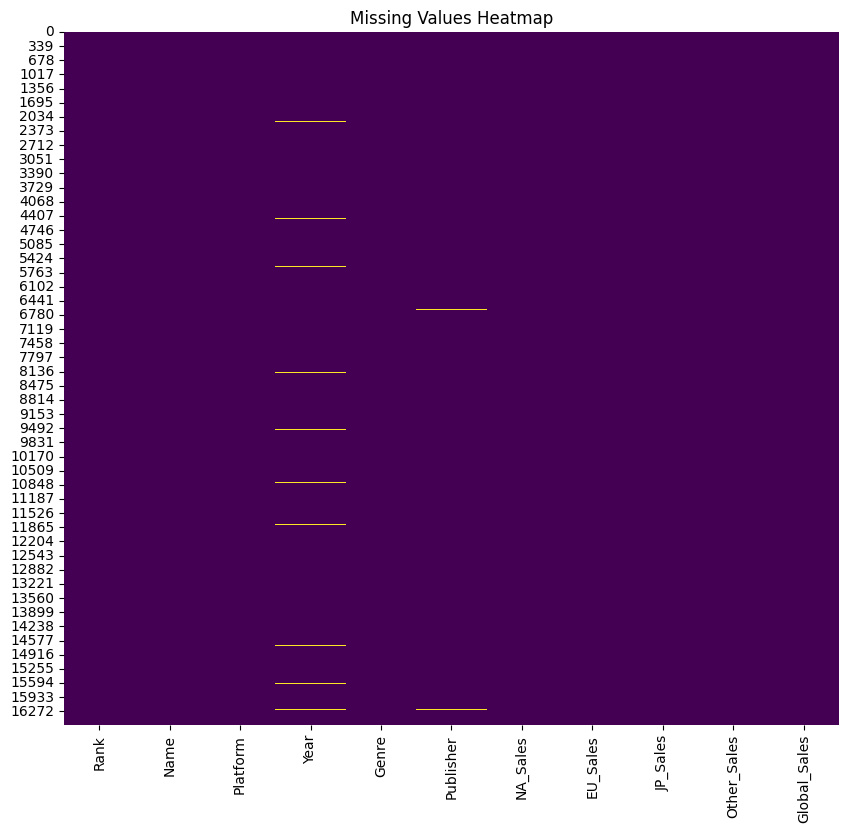

In [8]:
plt.figure(figsize=(10, 9))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#These light lines visually confirm the presence of missing values in those specific columns

#### Handling Missing Values/Null Values

In [13]:
median_year = df['Year'].median()
df['Year'].fillna(median_year, inplace=True)

mode_publisher = df['Publisher'].mode()[0]
df['Publisher'].fillna(mode_publisher, inplace=True)
#this fills any missing (NaN) values in the 'Year' column with the

# Convert 'Year' to integer after imputation as it now has no NaNs
df['Year'] = df['Year'].astype(int)

print("Missing values after handling:")
print(df.isnull().sum())

print(f"\nTotal missing values in the dataset: {df.isnull().sum().sum()}")

Missing values after handling:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Total missing values in the dataset: 0


/tmp/ipython-input-272169778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(median_year, inplace=True)
/tmp/ipython-input-272169778.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [10]:
#downloading this cleanded "games.csv" dataset

df.to_csv('cleaned_vgsales.csv', index=False)
print("Dataset saved to 'vgsales.csv'")

Dataset saved to 'vgsales.csv'
